In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',800)

In [27]:
names = ['X','Y','month','day','ffmc','dmc','dc','isi','temp','rh','wind','rain','area']
forest_data = pd.read_csv("../data/forestfires.csv",names=names)

In [28]:
forest_data.head()

,X,Y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [29]:
forest_data.shape

(517, 13)

In [30]:
forest_data.dtypes

X          int64
Y          int64
month     object
day       object
ffmc     float64
dmc      float64
dc       float64
isi      float64
temp     float64
rh         int64
wind     float64
rain     float64
area     float64
dtype: object

## Descriptive Statistics

In [31]:
forest_data.describe()

,X,Y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [32]:
forest_data.corr(numeric_only=True,method='pearson')

,X,Y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
ffmc,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
dmc,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
dc,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
isi,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
rh,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


## Change string columns to numeric

In [33]:
forest_data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                          (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [34]:
forest_data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [38]:
print(forest_data.head())

   X  Y  month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Data Visualization

### Histogram

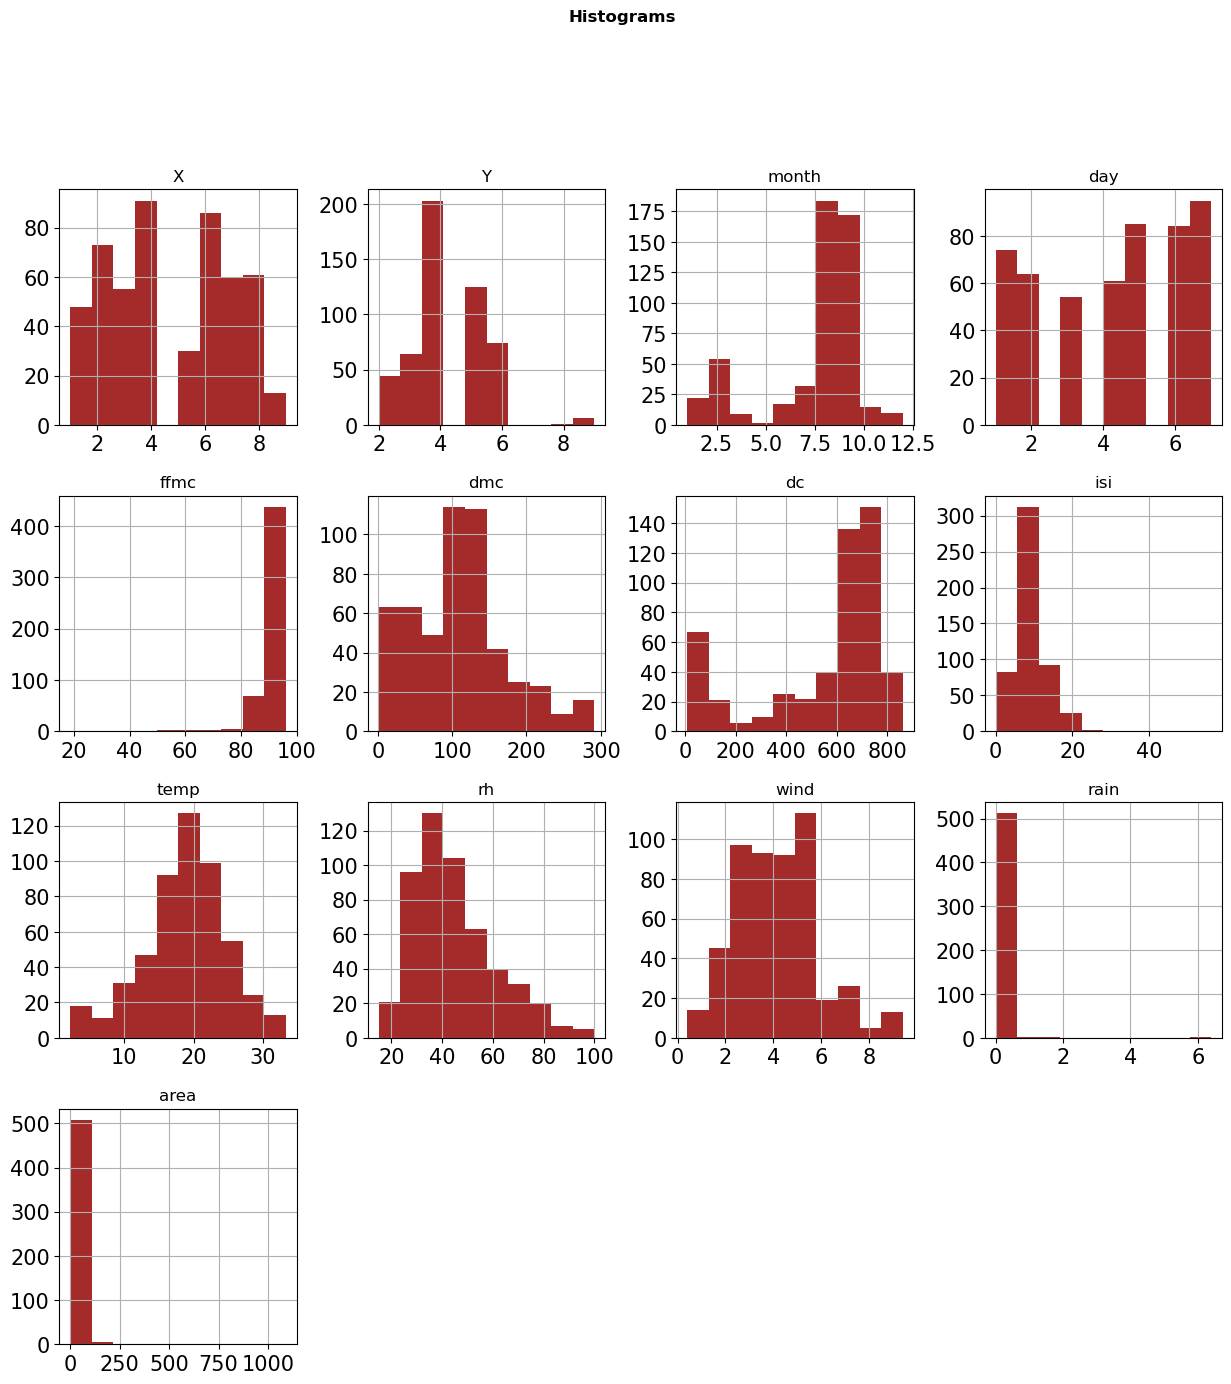

In [53]:
forest_data.hist(sharex=False,sharey=False,xlabelsize=15,ylabelsize=15,color='brown',figsize=(15,15))
plt.suptitle('Histograms',y=1.0,fontweight='bold')
plt.show()

### Density visualization

Text(0.5, 1.0, 'Probability Density Function')

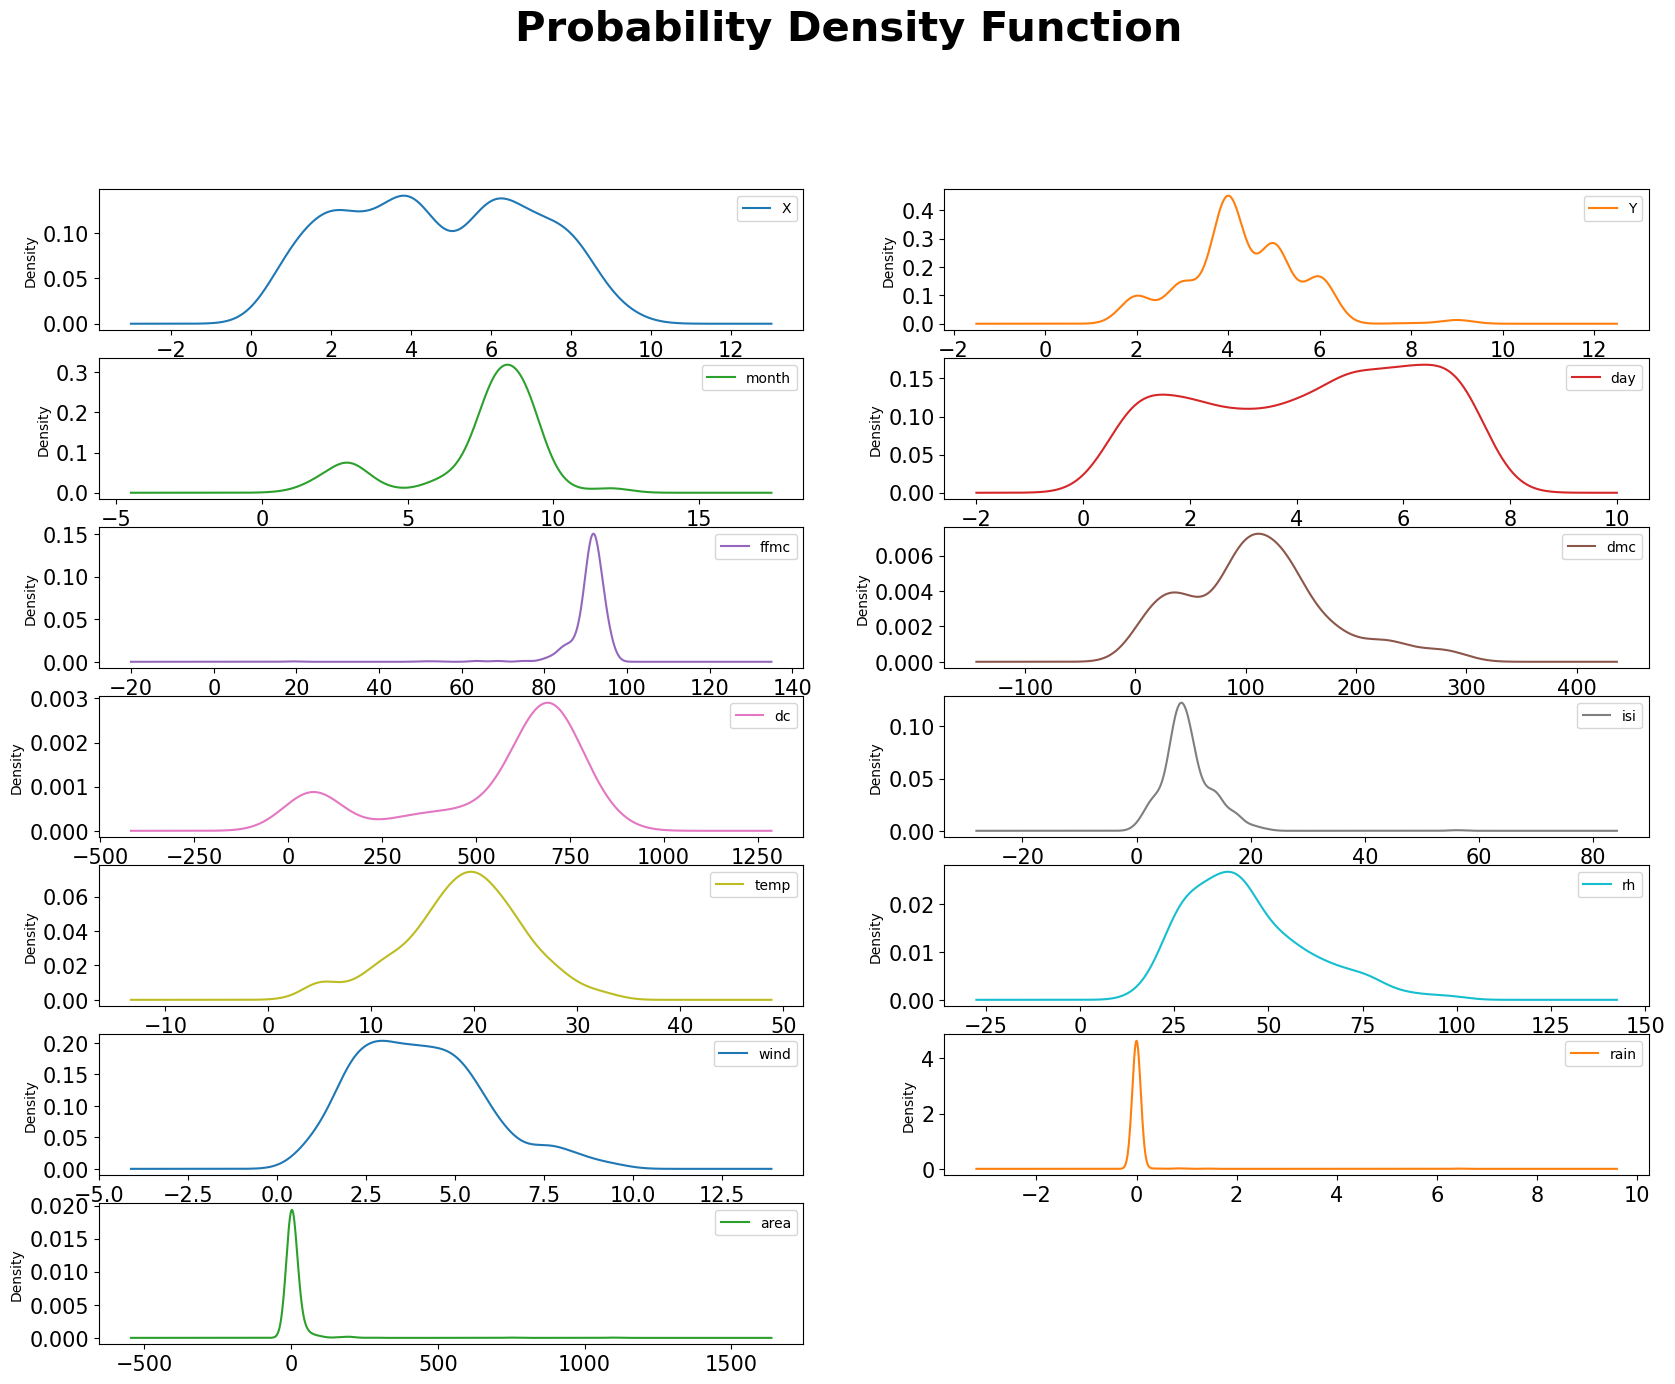

In [63]:
forest_data.plot(kind='density',subplots=True,sharex=False,fontsize=15,layout=(7,2),figsize=(20,15))
plt.suptitle('Probability Density Function',y=1.0,fontweight='bold',fontsize=30)

### Scatter Matrix

In [64]:
from pandas.plotting import scatter_matrix

Text(0.5, 0.98, 'Scatter Matrix')

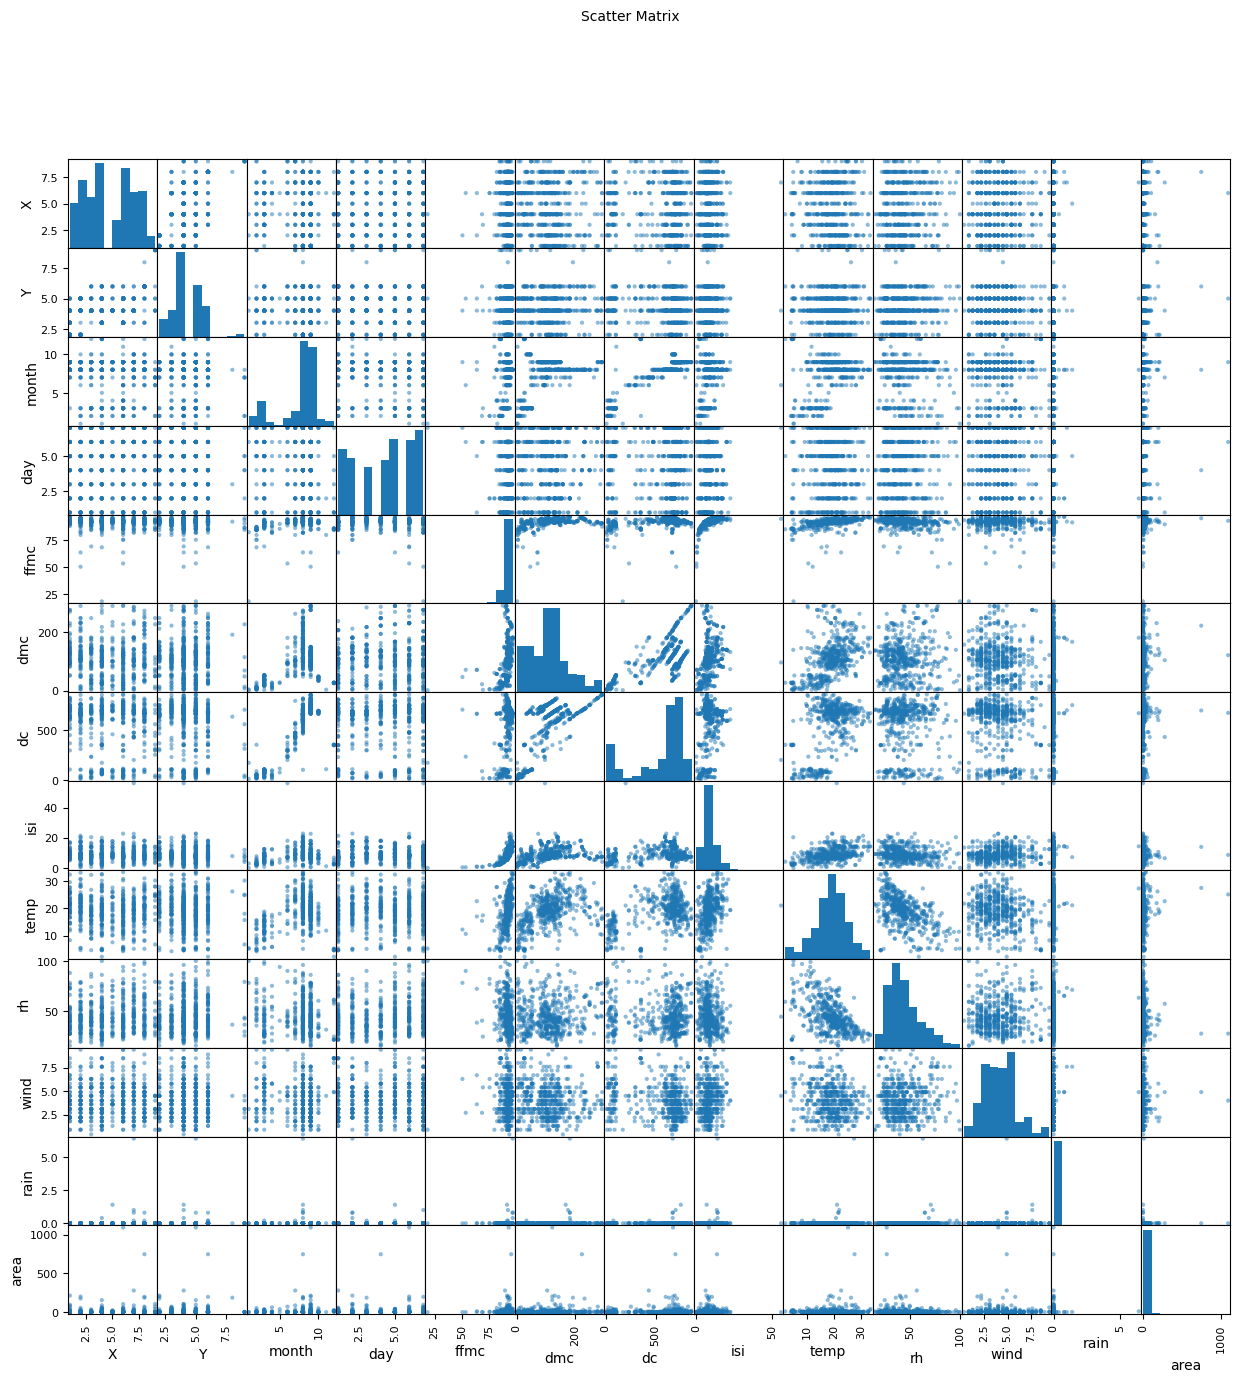

In [66]:
scatter_matrix(forest_data,figsize=(15,15))
plt.suptitle('Scatter Matrix',fontsize = 10)

### Heatmap

<AxesSubplot: >

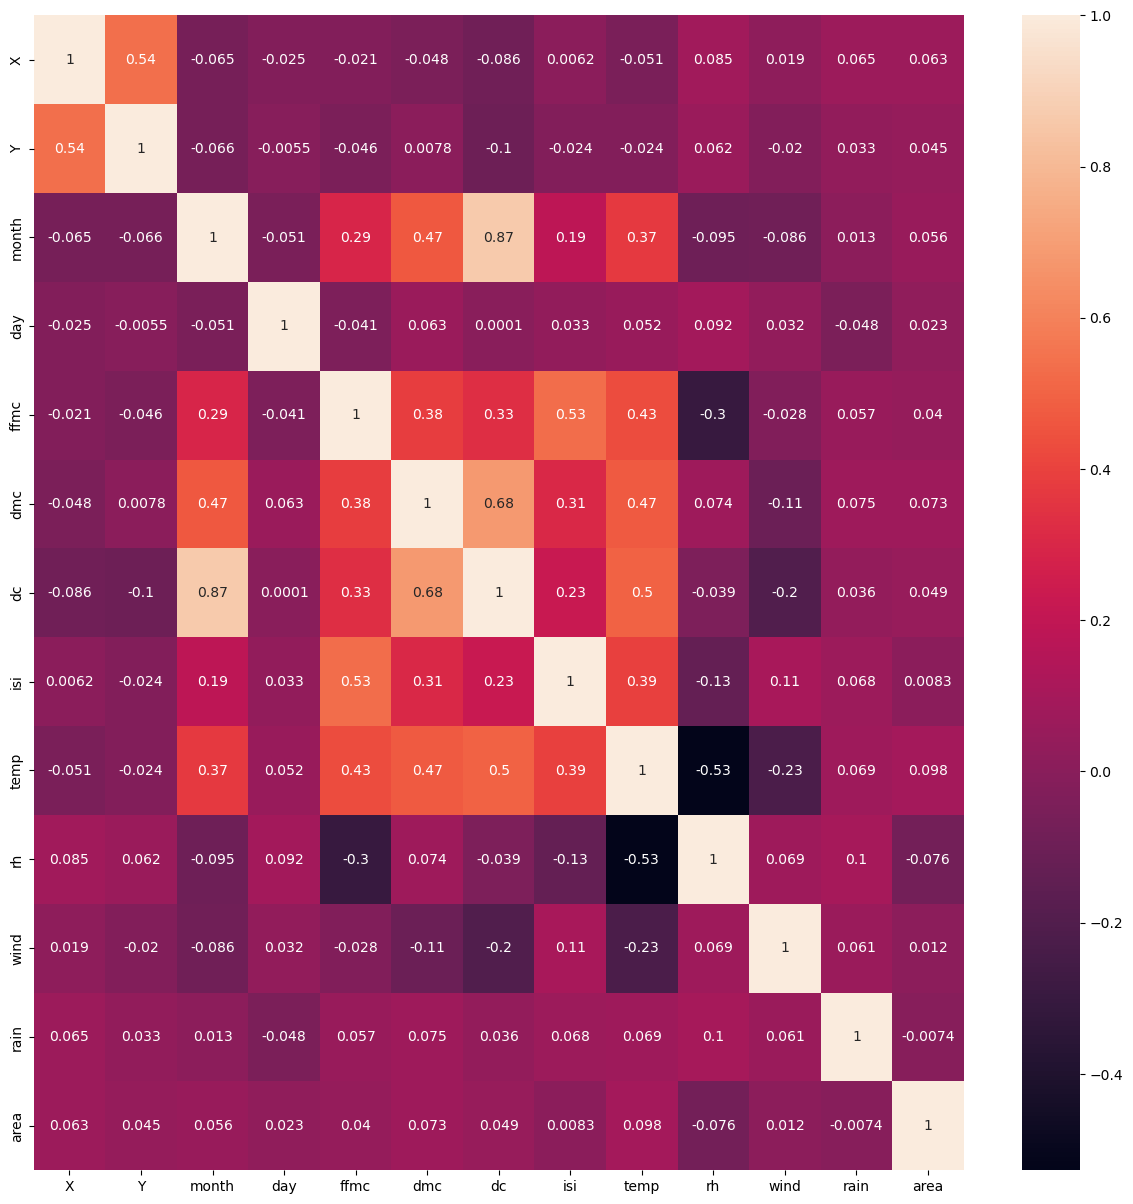

In [70]:
import seaborn as sns

plt.figure(figsize=(15,15))
plt.style.use('default')
sns.heatmap(forest_data.corr(numeric_only=True),annot=True)